# Assignment 1

### Folkert Stijnman - 10475206



<img style="float: left;" src="problem1.png">

In [3]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt

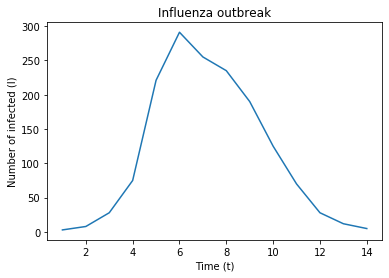

In [4]:
Infected_per_day = [3, 8, 28, 75, 221, 291, 255, 235, 190, 125, 70, 28, 12, 5]
Days = [i for i in range(1, 15)]

plt.plot(Days, Infected_per_day)
plt.title("Influenza outbreak")
plt.xlabel("Time (t)")
plt.ylabel("Number of infected (I)")
plt.show()

In [5]:
def sir(y, t, beta, gamma):
    S, I, R = y
    
    
    ds_dt = - beta * S * I
    di_dt = beta * S * I - gamma * I
    dr_dt = gamma * I
    
    return([ds_dt, di_dt, dr_dt])

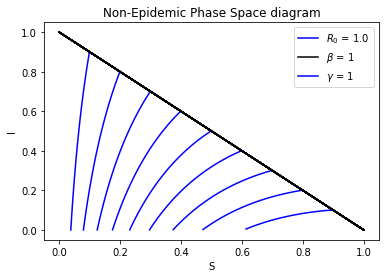

In [6]:
S = np.arange(0.099, 1, 0.1)
I = np.append(np.flip(np.arange(0.001, 1, 0.1)), np.repeat(0.001, 10))

R_0 = 0
beta = 1
gamma = 1

t = np.linspace(0, 10, 100)

for i in range(20):
    j = i % 10
    if S[j] > gamma/beta or I[i] > 0.001:
        solution = scipy.integrate.odeint(sir, [S[j], I[i], R_0], t, args=(beta,gamma))
        plt.plot(solution[:,0], solution[:,1], color="blue")
    plt.plot([0, 1], [1, 0], color="black")
    plt.legend(["$R_0$ = {0}".format(beta/gamma), "$\\beta$ = {0}".format(beta), "$\\gamma$ = {0}".format(gamma)])
    plt.title("Non-Epidemic Phase Space diagram")
    plt.xlabel("S")
    plt.ylabel("I")
    plt.savefig("non-epidemic.png")

0.10101010101010101


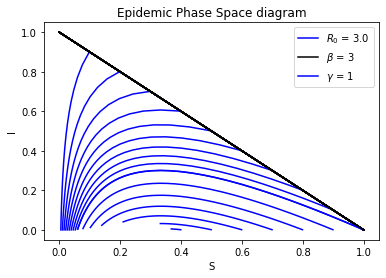

In [27]:
S = np.arange(0.099, 1, 0.1)
I = np.append(np.flip(np.arange(0.001, 1, 0.1)), np.repeat(0.001, 10))

R_0 = 0
beta = 3
gamma = 1

t = np.linspace(0, 10, 100)

for i in range(20):
    j = i % 10
    if S[j] > gamma/beta or I[i] > 0.001:
        solution = scipy.integrate.odeint(sir, [S[j], I[i], R_0], t, args=(beta,gamma))
        plt.plot(solution[:,0], solution[:,1], color="blue")
    plt.plot([0, 1], [1, 0], color="black")
    plt.legend(["$R_0$ = {0}".format(beta/gamma), "$\\beta$ = {0}".format(beta), "$\\gamma$ = {0}".format(gamma)])
    plt.title("Epidemic Phase Space diagram")
    plt.xlabel("S")
    plt.ylabel("I")
    plt.savefig("epidemic.png")

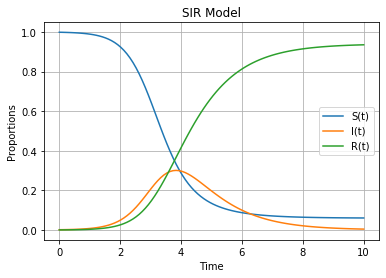

In [25]:
plt.figure(figsize=[6, 4])
plt.plot(t, solution[:, 0], label="S(t)")
plt.plot(t, solution[:, 1], label="I(t)")
plt.plot(t, solution[:, 2], label="R(t)")
plt.grid()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Proportions")
plt.title("SIR Model")
plt.show()